# 主成分分析

#### 准备数据

In [468]:
import numpy as np
import matplotlib.pyplot as plt

In [469]:
# 创建数据（三维围绕原点的正态分布）
np.random.seed(666)
sigma_x = 1
sigma_y = 10
cov = np.array([[sigma_x, 0], [0, sigma_y]])
data = np.random.multivariate_normal([0, 0], cov, 400)
# 数据旋转45度
theta = np.pi / 4
rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
data = data.dot(rotation_matrix)

(-10.0, 10.0)

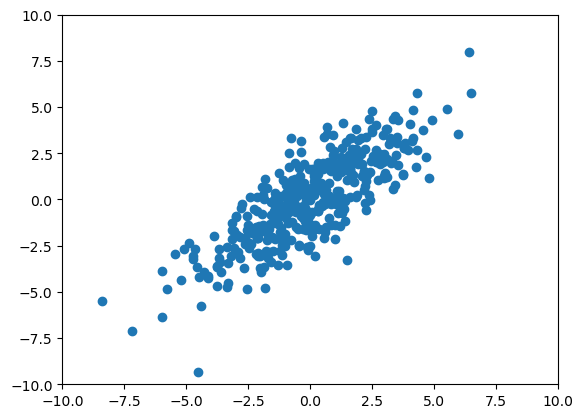

In [470]:
# 数据可视化
plt.scatter(data[:, 0], data[:, 1])
# 设置坐标轴范围
plt.xlim(-10, 10)
plt.ylim(-10, 10)

#### 使用PCA求解特征向量（SVD分解和特征值分解两种方法）

In [471]:
# 1. 均值归零
mean = np.mean(data, axis=0)
data = data - mean
# 2. 计算协方差矩阵(X.T * X / (n - 1))
cov = np.dot(data.T, data) / (data.shape[0] - 1)

In [472]:
# 3. 计算特征向量
# 使用特征值分解法
eig_vals_eig, eig_vecs_eig = np.linalg.eig(cov)
# 使用SVD分解法
U, S, V = np.linalg.svd(cov)
eig_vecs_svd = V.T
# 输出两种方法得到的特征值和特征向量
print('特征值分解法：')
print('特征向量（无序）：', eig_vecs_eig)
print('SVD分解法：')
print('特征向量：', eig_vecs_svd)

特征值分解法：
特征向量（无序）： [[-0.71379369 -0.70035603]
 [ 0.70035603 -0.71379369]]
SVD分解法：
特征向量： [[-0.70035603 -0.71379369]
 [-0.71379369  0.70035603]]


In [473]:
# 4. 选择主成分
eig_pairs = [(np.abs(eig_vals_eig[i]), eig_vecs_eig[:, i]) for i in range(len(eig_vals_eig))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)

In [474]:
# 输出
print('协方差矩阵：\n', cov)
for i in range(len(eig_pairs)):
    print('特征值：', eig_pairs[i][0])
    print('特征向量：', eig_pairs[i][1])

协方差矩阵：
 [[5.38581895 4.44033309]
 [4.44033309 5.55460747]]
特征值： 9.911348240123584
特征向量： [-0.70035603 -0.71379369]
特征值： 1.0290781758395111
特征向量： [-0.71379369  0.70035603]


In [475]:
data_new_1 = np.dot(data, eig_pairs[0][1])
print('第一主成分投影模的均值：', np.mean(np.abs(data_new_1)))
print('第一主成分的方差：', np.var(data_new_1))

第一主成分投影模的均值： 2.507900115346837
第一主成分的方差： 9.886569869523273


In [476]:
data_new_2 = np.dot(data, eig_pairs[1][1])
print('第二主成分投影模的均值：', np.mean(np.abs(data_new_2)))
print('第二主成分的方差：', np.var(data_new_2))

第二主成分投影模的均值： 0.8169630315200657
第二主成分的方差： 1.0265054803999114


#### 比较SVD和EIG两种算法的结果速度
1. SVD快于EIG，一般PCA函数使用SVD算法
2. 在没有明确主成分的情况下，两者计算出的数值会有一定差异

In [477]:
# 比较SVD分解法和特征值分解法速度
# 生成n * n的随机矩阵
n = 1000
A = np.random.rand(n, n)

In [478]:
%%time
# 特征值分解法
eig_vals, eig_vecs = np.linalg.eig(A)

Wall time: 865 ms


In [479]:
# 以eigenvalue为key排序
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:, i]) for i in range(len(eig_vals))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)
# 输出前3个特征向量
for i in range(3):
    print(np.abs(eig_pairs[i][1])[0:3])

[0.03153624 0.03124767 0.03140246]
[0.03247705 0.00541206 0.01152263]
[0.03247705 0.00541206 0.01152263]


In [480]:
%%time
# SVD分解法
U, S, V = np.linalg.svd(A)
eig_vecs = V.T

Wall time: 255 ms


In [481]:
# 输出前3个特征向量（SVD无需排序）
for i in range(3):
    print(np.abs(eig_vecs[0:3, i]))

[0.031261   0.03073313 0.0320946 ]
[0.03877995 0.02119789 0.01264243]
[0.02601087 0.02384845 0.05791969]
